###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

(1000, 5)
(1000,)


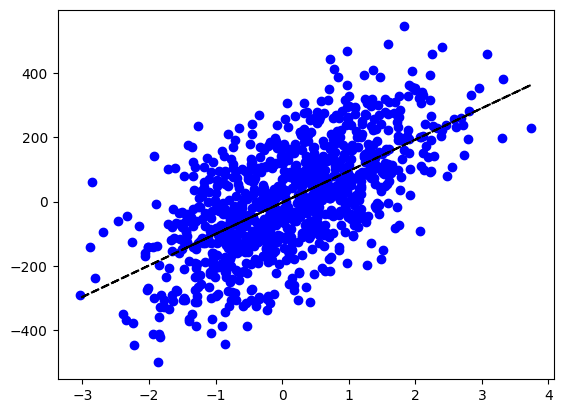

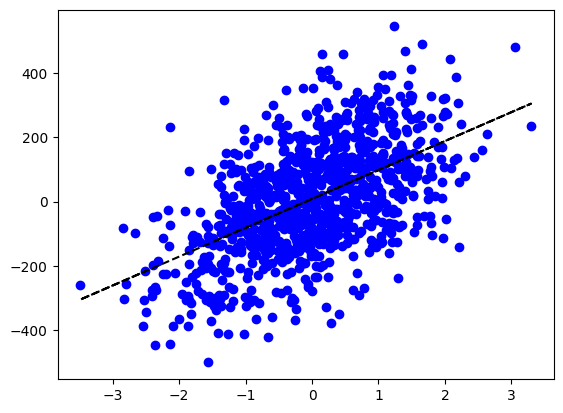

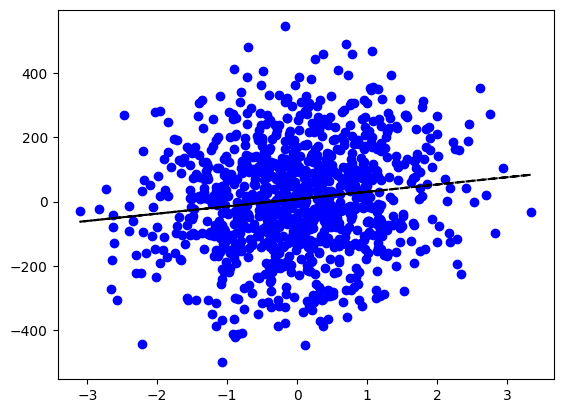

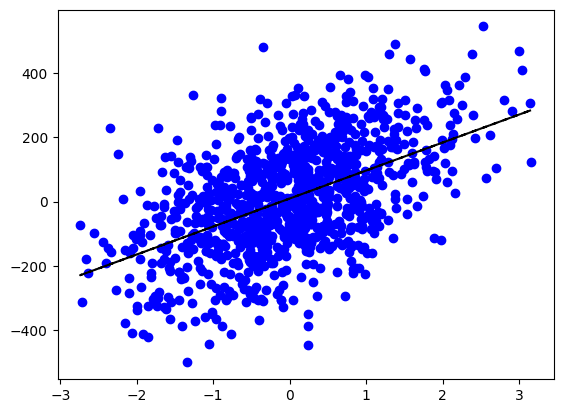

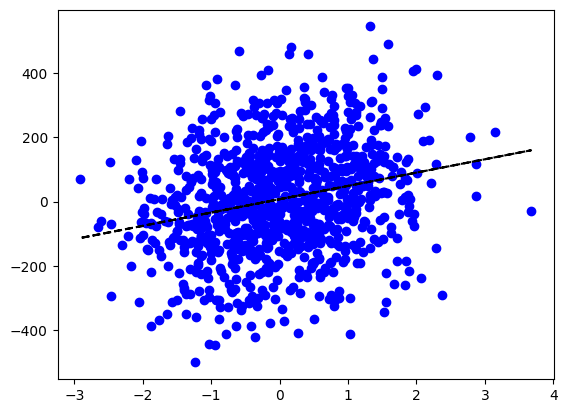

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mr
X,y = mr(n_samples=1000, n_features=5, noise=0)
print(X.shape)
print(y.shape)
for i in range(5):
  plt.scatter(X[:,i],y, color='blue')
  m,b= np.polyfit(X[:,i], y, 1)
  plt.plot(1,1, 'b', X[:,i], m*X[:,i]+b, '--k')
  plt.show()



### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

(1000, 2)
(1000,)


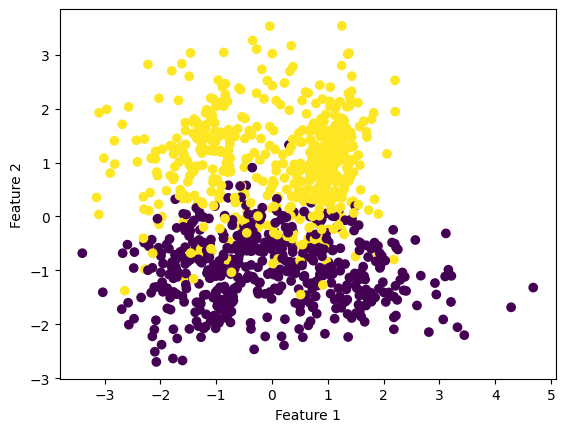

In [18]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

(1000, 2)
(1000,)


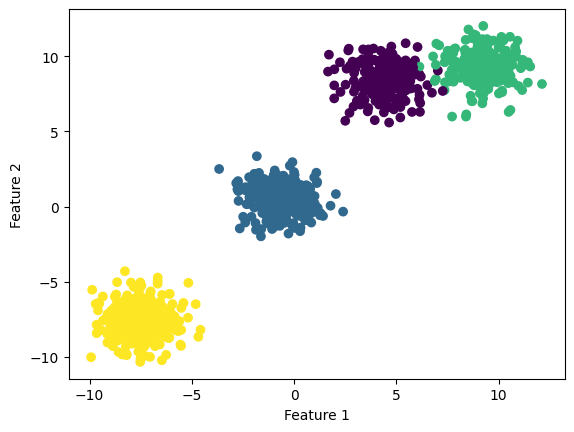

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
     

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing the table
url = 'https://www.worldometers.info/coronavirus/'

# Fetch the webpage
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Locate the table - you might need to adjust the selector
table = soup.find('table')

# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if columns:
        rows.append([column.text.strip() for column in columns])

# Create a DataFrame
df = pd.DataFrame(rows, columns=headers)

# Save the DataFrame to a CSV file (optional)
df.to_csv('table_data.csv', index=False)

# Print the DataFrame
print(df)


    #   Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0       North America  131,889,132            1,695,941             
1                Asia  221,500,265            1,553,662             
2              Europe  253,406,198            2,101,824             
3       South America   70,200,879            1,367,332             
4             Oceania   14,895,771               33,015             
..  ..            ...          ...      ...         ...       ...   
242            Total:   70,200,879            1,367,332             
243            Total:   14,895,771               33,015             
244            Total:   12,860,924              258,892             
245            Total:          721                   15             
246            Total:  704,753,890        0   7,010,681         0   

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ... TotalTests  \
0      127,665,129         +350   2,528,062            6,095  ...              
1      205,

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Class distribution: {0: 945, 1: 55}


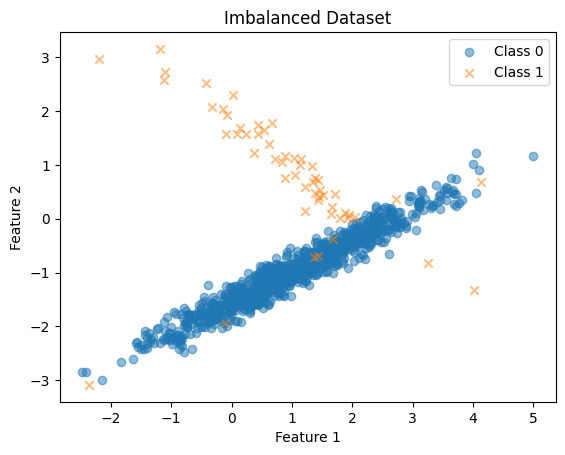

In [3]:
from sklearn.datasets import make_classification
import numpy as np

# Parameters
n_samples = 1000  # Total number of samples
n_features = 2    # Number of features
n_classes = 2     # Number of classes
n_clusters_per_class = 1  # Number of clusters per class
weights = [0.95, 0.05]  # Imbalance ratio: 90% of class 0 and 10% of class 1
class_sep = 1.0  # Separation between the classes

# Generate the dataset
X, y = make_classification(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=n_features,
                           n_redundant=0,
                           n_clusters_per_class=n_clusters_per_class,
                           weights=weights,
                           class_sep=class_sep,
                           random_state=42)

# Display the class distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution:", class_distribution)

# Optionally, you can visualize the dataset if needed
import matplotlib.pyplot as plt

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Imbalanced Dataset')
plt.show()



Resampled class distribution: {0: 945, 1: 275}


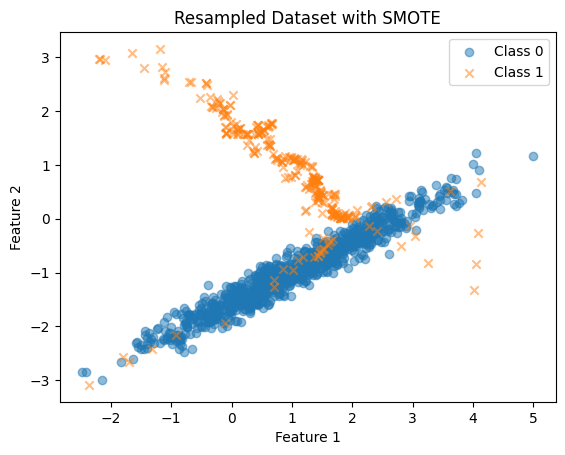

In [6]:
from imblearn.over_sampling import SMOTE

# Calculate the number of samples to generate for the minority class
minority_class_count = class_distribution[1]
target_minority_class_count = minority_class_count * 5
total_samples_needed = target_minority_class_count + class_distribution[0]

# Perform SMOTE to achieve the target class distribution
smote = SMOTE(sampling_strategy={1: target_minority_class_count}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
resampled_class_distribution = dict(zip(unique_resampled, counts_resampled))
print("Resampled class distribution:", resampled_class_distribution)

# Optionally, you can visualize the resampled dataset if needed
import matplotlib.pyplot as plt

plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.5, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Resampled Dataset with SMOTE')
plt.show()


Resampled class distribution: {0: 165, 1: 55}


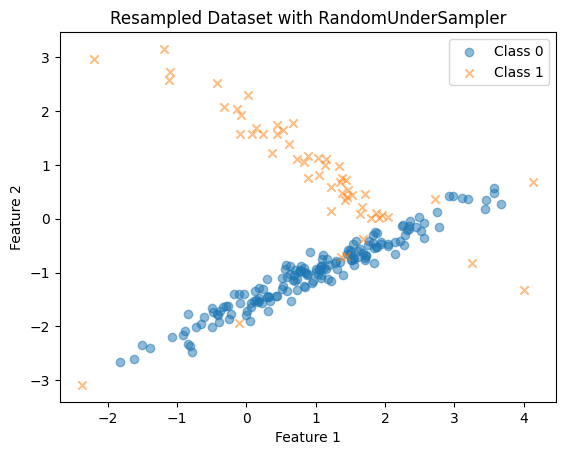

In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Calculate the number of samples for the majority class
minority_class_count = class_distribution[1]
target_majority_class_count = minority_class_count * 3

# Perform RandomUnderSampler to achieve the target class distribution
rus = RandomUnderSampler(sampling_strategy={0: target_majority_class_count, 1: minority_class_count}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Display the new class distribution
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
resampled_class_distribution = dict(zip(unique_resampled, counts_resampled))
print("Resampled class distribution:", resampled_class_distribution)

# Optionally, you can visualize the resampled dataset if needed
import matplotlib.pyplot as plt

plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1', alpha=0.5, marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Resampled Dataset with RandomUnderSampler')
plt.show()


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load a sample dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data

# Define feature variables (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

#First 5 rows
df.head()

#Check for missing values
null_summary = df.isnull().sum()
print(null_summary)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dimensions
print("Training set dimensions (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set dimensions (X_test, y_test):", X_test.shape, y_test.shape)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Optionally, transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the scaled training data to verify
print("First 5 rows of the scaled training data:\n", X_train_scaled[:5])

sepal length (cm)      0
sepal width (cm)       0
petal length (cm)      0
petal width (cm)       0
target               150
dtype: int64
Training set dimensions (X_train, y_train): (120, 4) (120,)
Testing set dimensions (X_test, y_test): (30, 4) (30,)
First 5 rows of the scaled training data:
 [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]
